# FIT5201 S1 2020 Assessment 1: Question 5- Ridge Regression


Student information
- Family Name:Muralitharan
- Given Name: Keerthana
- Student ID: 30159474
- Student email:kmur0015@student.monash.edu

Programming Language: R 3.3 in Jupyter Notebook

R Libraries used:
- reshape2
- ggplot

In [1]:
#Importing the packages
require(reshape2)
require(ggplot2)

Loading required package: reshape2

Loading required package: ggplot2



## Question 2:
Using R (with no use of special libraries), implement an SGD algorithm that you derived in Step I. 

#### Reading the train and test datasets

In [2]:
#Reading the train and test datasets
dtrain = read.csv("Task1C_train.csv")
dtest = read.csv("Task1C_test.csv")

In [5]:
#reading the data
read_data <- function(fname, sc) {
   data <- read.csv(file=fname,head=TRUE,sep=",")
   nr = dim(data)[1]
   nc = dim(data)[2]
   x = data[1:nr,1:(nc-1)]
   y = data[1:nr,nc]
   if (isTRUE(sc)) {
      #centers and/or scales the columns of a numeric matrix.
      x = scale(x)
      y = scale(y)
   }
   return (list("x" = x, "y" = y))
}

#### prediction function

predict the labels based on the coefficients

In [6]:
# auxiliary function to calculate labels based on the estimated coefficients
predict_func <- function(Phi, w){
    return(Phi%*%w)
}

#### Objective function

The error function( MSE)with the regularisation term  is calculated

In [7]:
# auxiliary function to calculate the objective function for the training
train_obj_func <- function (Phi, w, label, lambda){
    # return the objective function with the regularisation term 
    return(mean((predict_func(Phi, w) - label)^2) + .5 * lambda * w %*% w)
}

##### Error function

error values based on tau counter is calculated for test and train datasets

In [8]:
# auxiliary function to compute the error of the model
get_errors <- function(train_data, test_data, W, lambda) {
   n_weights = dim(W)[1]
   #create an error matrix to store the train and test errors based on tau value
   errors = matrix(,nrow=n_weights, ncol=2)
   #Calculate the errors of train and test data 
   for (tau in 1:n_weights) {
      errors[tau,1] = train_obj_func(train_data$x, W[tau,],train_data$y, lambda)
      errors[tau,2] = train_obj_func(test_data$x, W[tau,],test_data$y, lambda)
   }
    #return the last row of the data
    last_row <- nrow(errors)
   return(errors[last_row,])
}

##### Stochastic gradient descent Algorithm Implementation
The weight vectors are updates and objective function is calculated for diffent values of counter **tau**

In [9]:
##--- Stochastic Gradient Descent --------------------------------------------
sgd_train <- function(train_x, train_y, lambda, eta, epsilon, max_epoch) {
   train_len = dim(train_x)[1]
   tau_max = max_epoch * train_len

   W <- matrix(,nrow=tau_max, ncol=ncol(train_x)) 
   W[1,] <- runif(ncol(train_x))
  
   tau = 1 # counter 
   obj_func_val <-matrix(,nrow=tau_max, ncol=1) 
   obj_func_val[tau,1] = train_obj_func(train_x, W[tau,],train_y, lambda)

   while (tau <= tau_max){

       # check termination criteria
       if (obj_func_val[tau,1]<=epsilon) {break}
 
       # shuffle data:
       train_index <- sample(1:train_len, train_len, replace = FALSE)
    
       # loop over each datapoint
       for (i in train_index) {
           # increment the counter
           tau <- tau + 1
           if (tau > tau_max) {break}

           # make the weight update
           y_pred <- predict_func(train_x[i,], W[tau-1,])
           W[tau,] <- sgd_update_weight(W[tau-1,], train_x[i,], train_y[i], y_pred, lambda, eta)

           # keep track of the objective funtion
           obj_func_val[tau,1] = train_obj_func(train_x, W[tau,],train_y, lambda)
       }
   }
   # resulting values for the training objective function as well as the weights
   return(list('vals'=obj_func_val,'W'=W))
}


#### Weight Vector

The weight vector is updated by finding the difference of the true and predicted values and summing it with the regularisation term **lambda**

In [10]:
# updating the weight vector
sgd_update_weight <- function(W_prev, x, y_true, y_pred, lambda, eta) {
   # 
   grad = - (y_true-y_pred) * x + (lambda*W_prev)
   return(W_prev - eta * grad)
}

## Question : 

For each lambda in {0, 0.4, 0.8, …, 10}, build a regression model and compute the training and testing errors, using the provided data sets. While building each model, all parameter settings (initial values, learning rate, etc) are exactly the same, except a lambda value. Set the termination criterion as maximum of 20 x N weight updates (where N is the number of training data). Create a plot of error rates (use different colors for the training and testing errors), where the x-axis is log lambda and y-axis is the error rate.

### Stochastic gradient descent training
The sgd is trained and the errors are calculated for different **lambda** values from 0.0 to 10.00 with a step of 0.4

In [11]:
play_with_sgd <- function(){
   ## reading the data
   dtrain = read_data("Task1C_train.csv", TRUE)
   dtest = read_data("Task1C_test.csv", TRUE)
    # a dataframe is created to find all the misclassified samples for each lambda value from 0 to 10 with a stepsize of 0.4
    miss <- data.frame('lambda'=seq(0,10,by=0.4), 'train'=0,'test'=0)
    n<-0
    for(i in 1:26){
   ##### SGD Trainng
   max_epoch = 20
   epsilon = .001
   eta = .01
   lambda=n
   miss[i,'lambda']=lambda
  
   train_res = sgd_train(dtrain$x, dtrain$y, lambda, eta, epsilon, max_epoch)
   errors = get_errors(dtrain, dtest, train_res$W,lambda) 
    miss[i,'train']<-errors[1]
    miss[i,'test']<-errors[2]
    n=n+0.4
}
return(miss)
}


##### The SGD is called and the error are stored in a dataframe

In [12]:
options(warn=-1)
miss<-play_with_sgd()

In [14]:
###snippet of the error dataframe
cat("\nThe snippet of the error dataframe \n")
head(miss)


The snippet of the error dataframe 


lambda,train,test
0.0,0.07731655,0.6943870
0.4,0.15447799,0.7163719
0.8,0.22440729,0.6625594
1.2,0.27629096,0.6641708
1.6,0.30116800,0.6855939
2.0,0.32431168,0.7109367


#### Graph
The graph is plotted for different train and test datapoints versus the lambda value

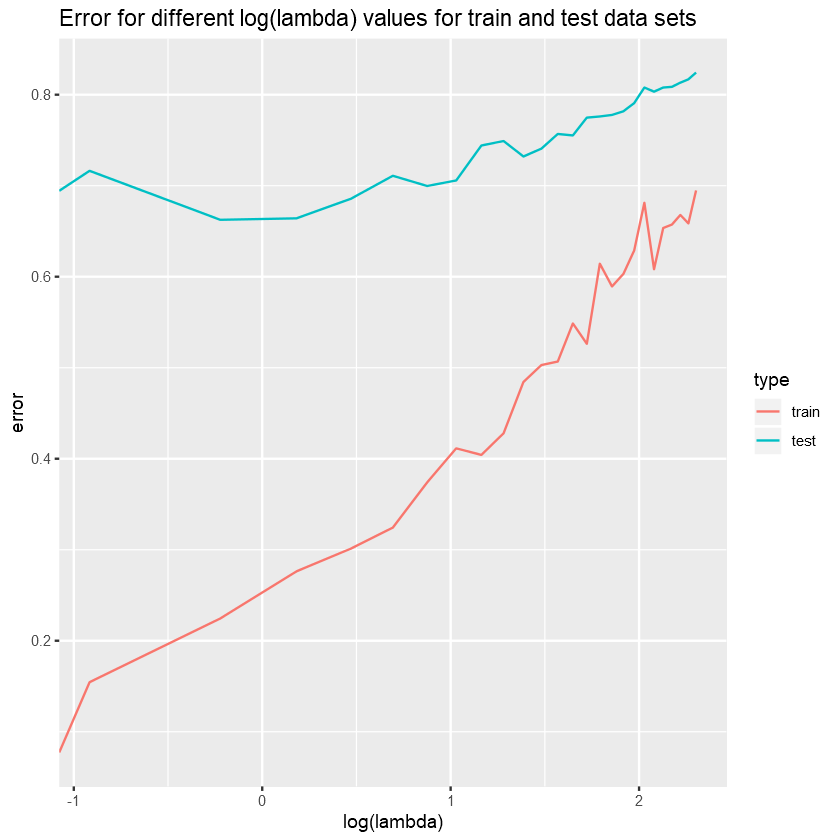

In [15]:
miss.m <- melt(miss, id='lambda') # reshape for visualisation
names(miss.m)<-c('lambda','type','error') # rename the columns
ggplot(data=miss.m,aes(x=log(lambda),y=error,color=type))+geom_line() + ggtitle("Error for different log(lambda) values for train and test data sets")

## Question:
Based on your plot in the previous part (Part b), what’s the best value for lambda? Discuss lambda, model complexity, and error rates, corresponding to underfitting and overfitting, by observing your plot.

#### Observation:

- The best value of log(lambda) is -0.1 which implies the **lambda** to be **0.8**
- model complexity - 𝜆 increases, model becomes less complex, training error increases
- error rates - training error increases, test error  for high values of lambda also increases which leads to **under-fitting**
- - error rates - training error is very less , test error is huge for lower values of lambda also increases which leads to **over-fiiting**

#### References:

- Alexandia Notes
- A1_Q5_codebase.R